# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv("BA_review_route.csv")

# Veri Düzenleme

In [3]:
df

,Unnamed: 0,reviews,Rota
0,0,✅ Trip Verified | Despite boarding being the u...,London to Santiago
1,1,"Not Verified | Flight cancelled, no crew! 9th...",London Heathrow to Faro
2,2,"Not Verified | The worst service ever, my bag...",Kuwait to Lisbon via London
3,3,✅ Trip Verified | 4/4 flights we booked this ...,London to Munich
4,4,✅ Trip Verified | British Airways has a total...,Frankfurt to London City
...,...,...,...
995,995,✅ Trip Verified | London to Boston. I was sea...,London to Boston
996,996,✅ Trip Verified | Stockholm to London. Standar...,Stockholm to London
997,997,✅ Trip Verified | Amsterdam to London arrived...,Amsterdam to London
998,998,✅ Trip Verified | Buenos Aires to London. We ...,Buenos Aires to London


In [4]:
df.columns = ["Index", "Onay_Durumu_ve_Yorum", "Rota"]

In [5]:
df

,Index,Onay_Durumu_ve_Yorum,Rota
0,0,✅ Trip Verified | Despite boarding being the u...,London to Santiago
1,1,"Not Verified | Flight cancelled, no crew! 9th...",London Heathrow to Faro
2,2,"Not Verified | The worst service ever, my bag...",Kuwait to Lisbon via London
3,3,✅ Trip Verified | 4/4 flights we booked this ...,London to Munich
4,4,✅ Trip Verified | British Airways has a total...,Frankfurt to London City
...,...,...,...
995,995,✅ Trip Verified | London to Boston. I was sea...,London to Boston
996,996,✅ Trip Verified | Stockholm to London. Standar...,Stockholm to London
997,997,✅ Trip Verified | Amsterdam to London arrived...,Amsterdam to London
998,998,✅ Trip Verified | Buenos Aires to London. We ...,Buenos Aires to London


In [6]:
df[['Onay_Durumu', 'Yorum']] = df['Onay_Durumu_ve_Yorum'].str.split('|', expand=True)

In [7]:
df = df.drop(columns=['Onay_Durumu_ve_Yorum'])

In [8]:
df = df.drop(columns=['Index'])

In [9]:
df.head()

,Rota,Onay_Durumu,Yorum
0,London to Santiago,✅ Trip Verified,Despite boarding being the usual free for all...
1,London Heathrow to Faro,Not Verified,"Flight cancelled, no crew! 9th September 202..."
2,Kuwait to Lisbon via London,Not Verified,"The worst service ever, my baggage did not a..."
3,London to Munich,✅ Trip Verified,4/4 flights we booked this holiday were dela...
4,Frankfurt to London City,✅ Trip Verified,British Airways has a total lack of respect ...


In [10]:
df["Onay_Durumu"] = df["Onay_Durumu"].str.replace("✅", "").str.strip()

In [11]:
df

,Rota,Onay_Durumu,Yorum
0,London to Santiago,Trip Verified,Despite boarding being the usual free for all...
1,London Heathrow to Faro,Not Verified,"Flight cancelled, no crew! 9th September 202..."
2,Kuwait to Lisbon via London,Not Verified,"The worst service ever, my baggage did not a..."
3,London to Munich,Trip Verified,4/4 flights we booked this holiday were dela...
4,Frankfurt to London City,Trip Verified,British Airways has a total lack of respect ...
...,...,...,...
995,London to Boston,Trip Verified,London to Boston. I was seated next to a cus...
996,Stockholm to London,Trip Verified,Stockholm to London. Standard configuration o...
997,Amsterdam to London,Trip Verified,Amsterdam to London arrived 33 minutes late ...
998,Buenos Aires to London,Trip Verified,Buenos Aires to London. We flew overnight Fr...


# Veri Analizi 1 - Yorum Analizi - İyi/Kötü/Nötr Ayrımı

In [12]:
from textblob import TextBlob

In [13]:
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.0:
        return "iyi"
    elif analysis.sentiment.polarity < 0.0:
        return "kötü"
    else:
        return "nötr"

In [14]:
df["Yorum_Tipi"] = df["Yorum"].apply(sentiment_analysis)

In [15]:
df

,Rota,Onay_Durumu,Yorum,Yorum_Tipi
0,London to Santiago,Trip Verified,Despite boarding being the usual free for all...,iyi
1,London Heathrow to Faro,Not Verified,"Flight cancelled, no crew! 9th September 202...",kötü
2,Kuwait to Lisbon via London,Not Verified,"The worst service ever, my baggage did not a...",kötü
3,London to Munich,Trip Verified,4/4 flights we booked this holiday were dela...,kötü
4,Frankfurt to London City,Trip Verified,British Airways has a total lack of respect ...,kötü
...,...,...,...,...
995,London to Boston,Trip Verified,London to Boston. I was seated next to a cus...,iyi
996,Stockholm to London,Trip Verified,Stockholm to London. Standard configuration o...,iyi
997,Amsterdam to London,Trip Verified,Amsterdam to London arrived 33 minutes late ...,iyi
998,Buenos Aires to London,Trip Verified,Buenos Aires to London. We flew overnight Fr...,kötü


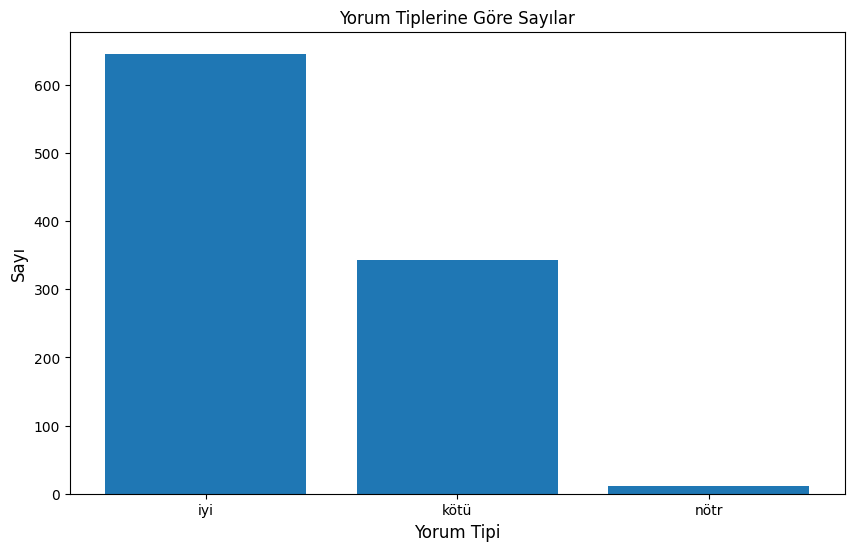

In [16]:
yorum_sayilari = df['Yorum_Tipi'].value_counts()

# Bar grafiğini oluşturun
plt.figure(figsize=(10,6))
plt.bar(yorum_sayilari.index, yorum_sayilari.values)

plt.title('Yorum Tiplerine Göre Sayılar')
plt.ylabel('Sayı', fontsize=12)
plt.xlabel('Yorum Tipi', fontsize=12)

plt.show()

# Veri Analizi 2 - Rota Analizi - Nereden/Nereye

In [17]:
# 'Rota' sütununda ' to ' içermeyen satırları bulun
invalid_rows = df['Rota'].str.contains(' to ') == False

print(df[invalid_rows])

                  Rota    Onay_Durumu  \
166  London Singapore   Trip Verified   

                                                 Yorum Yorum_Tipi  
166    Although it was a bit uncomfortable flight i...        iyi  


In [18]:
df.isna().sum().sum()

3

In [19]:
df['Rota'] = df['Rota'].str.replace('London Singapore', 'London to Singapore')

In [20]:
df['Rota'].fillna('Unknown to Unknown', inplace=True)

In [21]:
df[df['Rota'].str.count(' to ') > 1]

,Rota,Onay_Durumu,Yorum,Yorum_Tipi
638,doha to londonDoha to London,Trip Verified,"Doha to London. Surprisingly good flight, on...",iyi
938,Bucharest to London Heathrow to Los Angeles,Trip Verified,I understand completely why there is air rage...,iyi


In [22]:
df['Rota'] = df['Rota'].str.replace('doha to londonDoha to London', 'Doha to London')
df['Rota'] = df['Rota'].str.replace('Bucharest to London Heathrow to Los Angeles', 'Bucharest to Los Angeles')

In [23]:
df[['Nereden', 'Nereye']] = df['Rota'].str.split(' to ', expand=True)

In [24]:
df = df.drop(columns=['Rota'])

In [25]:
df

,Onay_Durumu,Yorum,Yorum_Tipi,Nereden,Nereye
0,Trip Verified,Despite boarding being the usual free for all...,iyi,London,Santiago
1,Not Verified,"Flight cancelled, no crew! 9th September 202...",kötü,London Heathrow,Faro
2,Not Verified,"The worst service ever, my baggage did not a...",kötü,Kuwait,Lisbon via London
3,Trip Verified,4/4 flights we booked this holiday were dela...,kötü,London,Munich
4,Trip Verified,British Airways has a total lack of respect ...,kötü,Frankfurt,London City
...,...,...,...,...,...
995,Trip Verified,London to Boston. I was seated next to a cus...,iyi,London,Boston
996,Trip Verified,Stockholm to London. Standard configuration o...,iyi,Stockholm,London
997,Trip Verified,Amsterdam to London arrived 33 minutes late ...,iyi,Amsterdam,London
998,Trip Verified,Buenos Aires to London. We flew overnight Fr...,kötü,Buenos Aires,London


In [26]:
print("En çok geçen 'Nereden' değerleri:")
print(df['Nereden'].value_counts().head(10))

print("\nEn çok geçen 'Nereye' değerleri:")
print(df['Nereye'].value_counts().head(10))

En çok geçen 'Nereden' değerleri:
Nereden
London             281
London Heathrow     78
Gatwick             37
Heathrow            23
Johannesburg        19
Vancouver           15
Los Angeles         13
New York            13
Cape Town           12
San Francisco       12
Name: count, dtype: int64

En çok geçen 'Nereye' değerleri:
Nereye
London             220
London Heathrow     68
Gatwick             23
Cape Town           16
London              14
Malaga              13
Johannesburg        11
Heathrow            11
Glasgow             10
London City         10
Name: count, dtype: int64
